In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import r2_score,mean_squared_error
from matplotlib import pyplot as plt
%matplotlib inline

/Users/anaconda3/lib/python3.8/site-packages/scipy/__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [11]:
path='SA-MD1/'
params='sample_matrix.csv'
model='results.txt'
df_model = pd.read_csv(path+model,header=None)
df_param = pd.read_csv(path+params)

In [12]:
df_param.head()

,cmax,cmax.1,cmax.2,cmax.3
0,304.672433,196.092846,288.617103,108.042352
1,171.394909,51.222722,61.658618,147.982790
2,442.861783,151.861485,49.029722,163.470253
3,583.949853,61.493824,103.332041,46.044853
4,261.797349,118.444634,187.567088,62.143091


In [2]:
path='MD1/csv/'
model='out_step1.csv'
params='param_step1.csv'
model='out_step2.csv'
params='param_step2.csv'
model='out_step2-old3.csv'
params='param_step2-old3.csv'
df_model = pd.read_csv(path+model,header=None)
df_param = pd.read_csv(path+params,header=None)

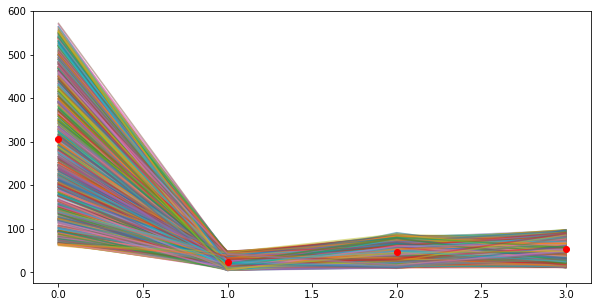

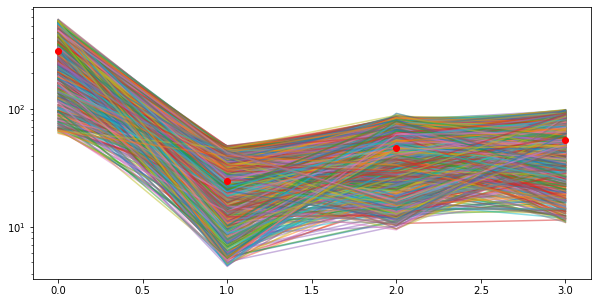

In [13]:
def match_plot(df,logy=False):
    df.iloc[0:-1,:].transpose().plot(logy=logy,legend=False,alpha=0.5,figsize=(10,5))
    df.iloc[-1,:].plot(logy=logy,legend=False,style="o",color='red');

match_plot(df_model)
match_plot(df_model,logy=True)

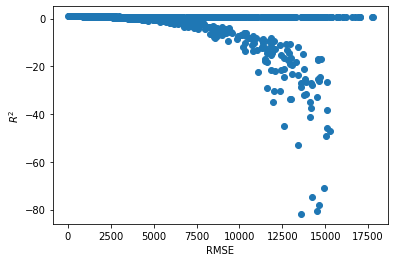

In [14]:
[n,m]=np.shape(df_model)
r2=[r2_score(df_model.iloc[i,:], df_model.iloc[-1,:]) for i in range(n-1)]
rmse=[mean_squared_error(df_model.iloc[i,:], df_model.iloc[-1,:]) for i in range(n-1)]
r2=np.asarray(r2)
rmse=np.asarray(rmse)
plt.plot(rmse,r2,'o'), plt.xlabel('RMSE'), plt.ylabel('$R^2$');

In [43]:
x,y=get_params(df_param,df_model,r2,r2lim=0.99)
x

,cmax,cmax.1,cmax.2,cmax.3
159,401.084608,66.986500,132.772630,74.991123
301,374.264563,163.224555,272.216475,85.235885
514,358.194990,97.847432,261.331152,100.095608
564,391.831779,101.249319,148.838093,83.547785
657,377.418294,93.451172,255.181043,123.748524
672,376.839215,96.484663,220.905684,107.515798
796,390.343186,120.412898,162.288819,71.483314
864,381.410375,148.728161,276.877634,115.504446
941,376.811770,77.463039,242.844873,83.435506
960,400.447187,28.739800,202.267863,79.539395


In [44]:
y

,0,1,2,3
159,312.615189,14.278083,29.565714,43.503921
301,297.331519,35.898132,60.282143,49.495987
514,289.480011,20.989168,57.502739,58.156682
564,310.968690,21.739985,33.172056,48.520869
657,308.346469,19.977546,55.771238,71.920254
672,305.610193,20.671738,48.689474,62.479220
796,303.816017,25.962859,36.074221,41.446057
864,310.017249,32.344613,60.465863,67.120766
941,299.189037,16.571348,53.717589,48.444294
960,316.702522,5.848142,44.879276,46.110526


In [ ]:
this is dominate by the cmax0, how to grab other values assuming they are disjoint

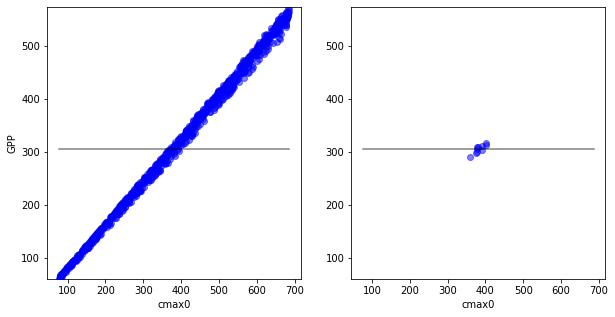

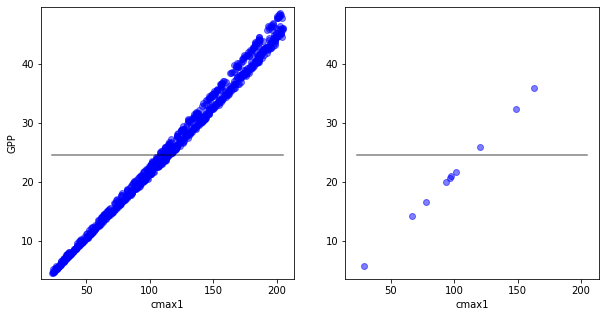

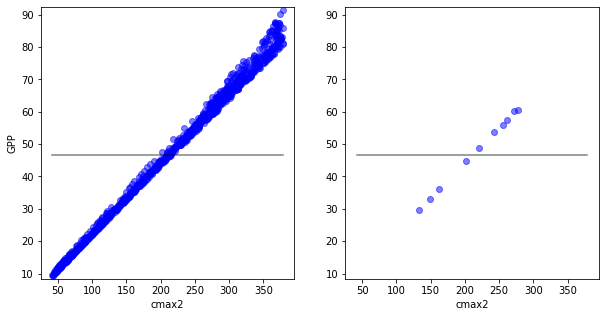

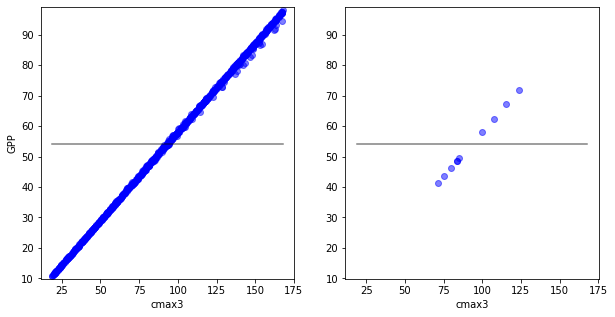

In [41]:
def get_params(x,y,r2,r2lim=0.95):
    xparams=x[r2>r2lim]
    ymodel=y.iloc[0:-1,:][r2>r2lim]
    return xparams, ymodel

def plot_paramsvstarget(x,y,r2,i=1,r2lim=0.95,xlabel='nmax1',ylabel='NPP'):
    
    tight_params, tight_model = get_params(x,y,r2,r2lim)
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))

    ax1.plot(x.iloc[:,i],y.iloc[0:-1,i],'o',alpha=0.5,color='b')
    ax1.set_xlabel(xlabel)
    ax1.set_ylabel(ylabel)
    ax1.set_ylim([min(y.iloc[:,i])-1, max(y.iloc[:,i]+1)])
    x1=min(x.iloc[:,i])
    x2=max(x.iloc[:,i])
    ax1.plot(np.linspace(x1,x2,10),np.ones(10)*y.iloc[-1,i],alpha=0.5,color='black')

    ax2.plot(tight_params.iloc[:,i],tight_model.iloc[:,i],'o',alpha=0.5,color='b')
    ax2.set_xlabel(xlabel)
    ax2.plot(np.linspace(x1,x2,10),np.ones(10)*y.iloc[-1,i],alpha=0.5,color='black')
    ax2.set_ylim([min(y.iloc[:,i])-1, max(y.iloc[:,i])+1])
    
for i in range(4):
    plot_paramsvstarget(df_param,df_model,r2,i,r2lim=0.99,xlabel='cmax'+str(i),ylabel='GPP')

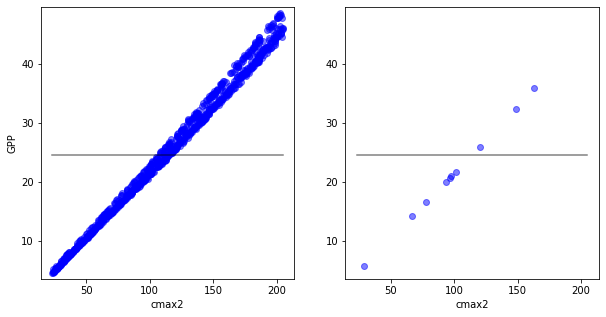

In [34]:
plot_paramsvstarget(df_param,df_model,r2,i=1,r2lim=0.99,xlabel='cmax2',ylabel='GPP')


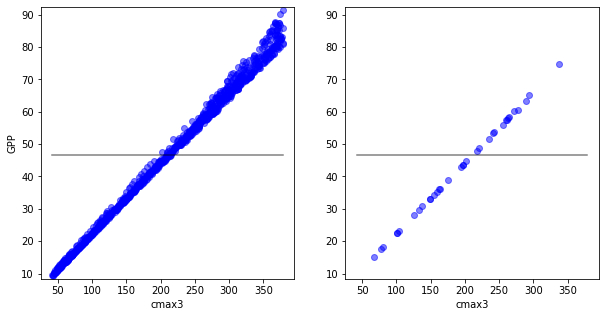

In [30]:
plot_paramsvstarget(df_param,df_model,r2,i=2,r2lim=0.98,xlabel='cmax3',ylabel='GPP')

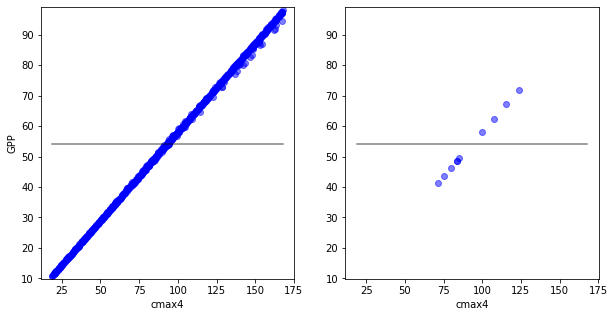

In [32]:
plot_paramsvstarget(df_param,df_model,r2,i=3,r2lim=0.99,xlabel='cmax4',ylabel='GPP')

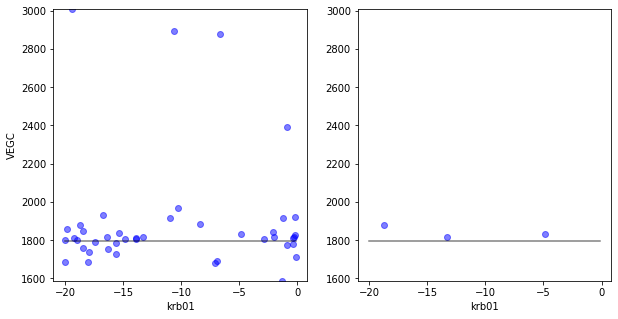

In [25]:
plot_paramsvstarget(df_param,df_model,r2,i=5,xlabel='krb01',ylabel='VEGC')

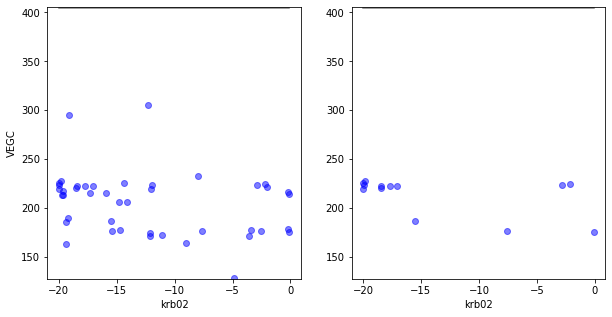

In [12]:
plot_paramsvstarget(df_param,df_model,r2,i=6,xlabel='krb02',ylabel='VEGC')

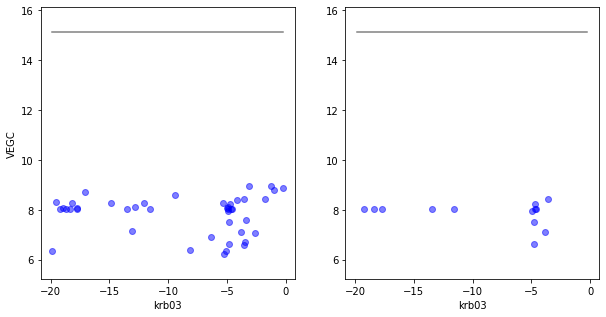

In [13]:
plot_paramsvstarget(df_param,df_model,r2,i=7,xlabel='krb03',ylabel='VEGC')

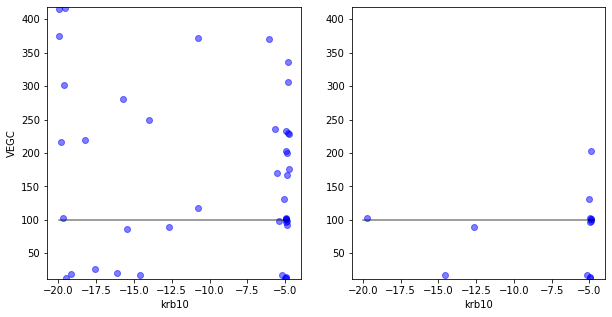

In [14]:
plot_paramsvstarget(df_param,df_model,r2,i=8,xlabel='krb10',ylabel='VEGC')

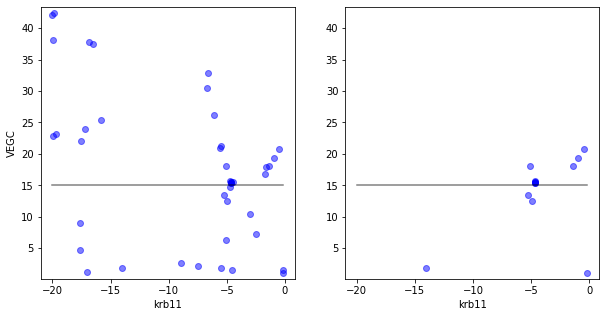

In [15]:
plot_paramsvstarget(df_param,df_model,r2,i=9,xlabel='krb11',ylabel='VEGC')

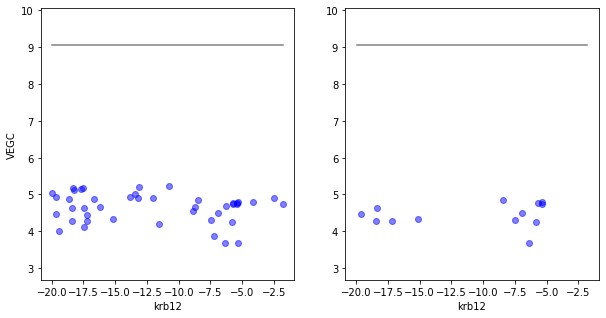

In [16]:
plot_paramsvstarget(df_param,df_model,r2,i=10,xlabel='krb12',ylabel='VEGC')

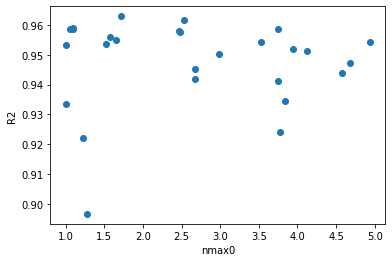

In [16]:
plt.plot(df_param.iloc[:,0],r2,'o');
plt.xlabel('nmax0'), plt.ylabel('R2');